In [2]:
from qiskit import *
from qiskit_ibm_provider import *
from qiskit_ibm_provider import *

In [3]:
circuit = QuantumCircuit(2, 2)

In [4]:
%matplotlib inline

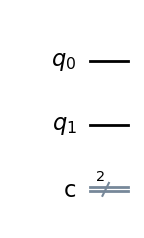

In [5]:
circuit.draw(output='mpl')

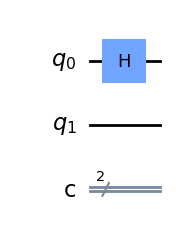

In [6]:
circuit.h(0)
circuit.draw(output='mpl')

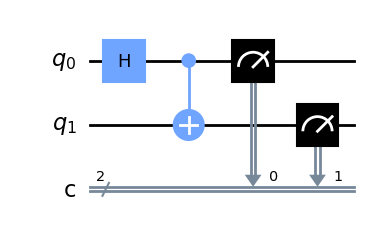

In [7]:
circuit.cx(0, 1) # q0 => control qubit and q1 => target qubit
circuit.measure([0, 1], [0, 1])
circuit.draw(output='mpl')

In [8]:
simulator = Aer.get_backend('qasm_simulator')

In [9]:
res = execute(circuit, backend=simulator).result()

In [10]:
from qiskit.visualization import plot_histogram

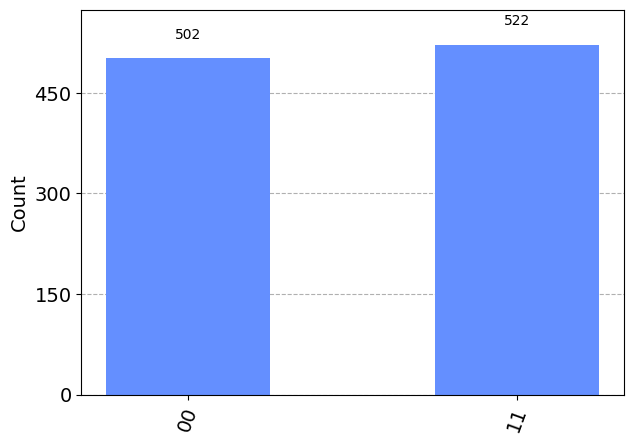

In [11]:
plot_histogram(res.get_counts(circuit))

In [12]:
IBMProvider.save_account("c781a8737abcdc86fb194b500c00fe3333ee87541d0df9868d981e3dd178694d02fbe29c7d6f0f48f22d79a81913a7853a6baf42795ec76e8d7dbc4f87ada38a", overwrite=True)

In [13]:
IBMQ.load_account()

C:\Users\Dell\AppData\Local\Temp\ipykernel_6544\485379158.py:1: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.load_account()
C:\Users\Dell\AppData\Local\Temp\ipykernel_6544\485379158.py:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [14]:
prov = IBMQ.get_provider("ibm-q")

In [15]:
for backend in prov.backends():
    try:
        qubit_Count = len(backend.properties().qubits)
    except:
        qubit_Count = "simulated"
    print(f"{backend.name()} : {backend.status().pending_jobs} and {qubit_Count} qubits")
'''
Note - The ones with an actual number of qubits are quantum computers and the ones which have "simulated" qubits are simulators. We must check which quantum computer among them has the least number of pending jobs at the moment. Thus, we can choose that quantum computer to proceed with our work.
'''

ibmq_qasm_simulator : 0 and simulated qubits
ibmq_lima : 53 and 5 qubits
ibmq_belem : 43 and 5 qubits
ibmq_quito : 42 and 5 qubits
simulator_statevector : 0 and simulated qubits
simulator_mps : 0 and simulated qubits
simulator_extended_stabilizer : 0 and simulated qubits
simulator_stabilizer : 0 and simulated qubits
ibmq_jakarta : 121 and 7 qubits
ibmq_manila : 244 and 5 qubits
ibm_lagos : 540 and 7 qubits
ibm_nairobi : 673 and 7 qubits
ibm_perth : 686 and 7 qubits


'\nNote - The ones with an actual number of qubits are quantum computers and the ones which have "simulated" qubits are simulators. We must check which quantum computer among them has the least number of pending jobs at the moment. Thus, we can choose that quantum computer to proceed with our work.\n'

In [20]:
quantum_Comp = prov.get_backend('ibmq_quito')

In [21]:
import qiskit.tools.jupyter
%qiskit_job_watcher

job = execute(circuit, backend=quantum_Comp)

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [23]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job is queued (None)

KeyboardInterrupt: 

In [ ]:
quatum_Result = job.result()
plot_histogram(quatum_Result.get_counts(circuit))